In [9]:
%matplotlib inline

In [45]:
import os
import time
import math
import numpy as np
from scipy import signal
import pandas as pd
import seaborn as sb
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools as it
import random

In [61]:
def corl_old(s1, s2, time_window):
    sig1=pd.Series(s1)
    sig2=pd.Series(s2)
    #max time shift of signal is time_window-1, if shift equal to time_window, all signal will be droped.
    corrmat=np.zeros(shape=time_window-1, dtype=np.float64)
    print("single1 is", s1)
    for t in list(range(time_window-1)):
        #fill_value argument is introduced in pandas 0.24.0
        #corrmat[t]=sig1.corr(sig2.shift(periods=-t, fill_value=0.), method="pearson")
        corrmat[t]=sig1.corr(sig2.shift(periods=-t).fillna(0.), method="pearson")
        print("delay time=", t, "corr=", corrmat[t])
        print("single2 is", sig2.shift(periods=-t).fillna(0.))
        max_value=np.amax(corrmat)
        max_index=np.where(corrmat==max_value)[0]
        
    return max_index, max_value

def corl(s1, s2):
    corrmat = signal.correlate(s1, s2, mode='full') / (np.linalg.norm(s1)*np.linalg.norm(s2))
    print(corrmat)
    max_value=np.amax(corrmat)
    max_index=np.where(corrmat==max_value)[0]
    return max_index, max_value

def corl_dumy(s1, s2):
    print("This is a dumy function.")
    pass
    return None, 0.

In [27]:
with h5py.File("../output/7_sigma.h5", "r") as f:
    print(list(f.keys()))
    d=f["Spike_index"][:]
    sd=f["Spike_Data"][:]
    #print(d[0:5])

['Spike_Data', 'Spike_index']


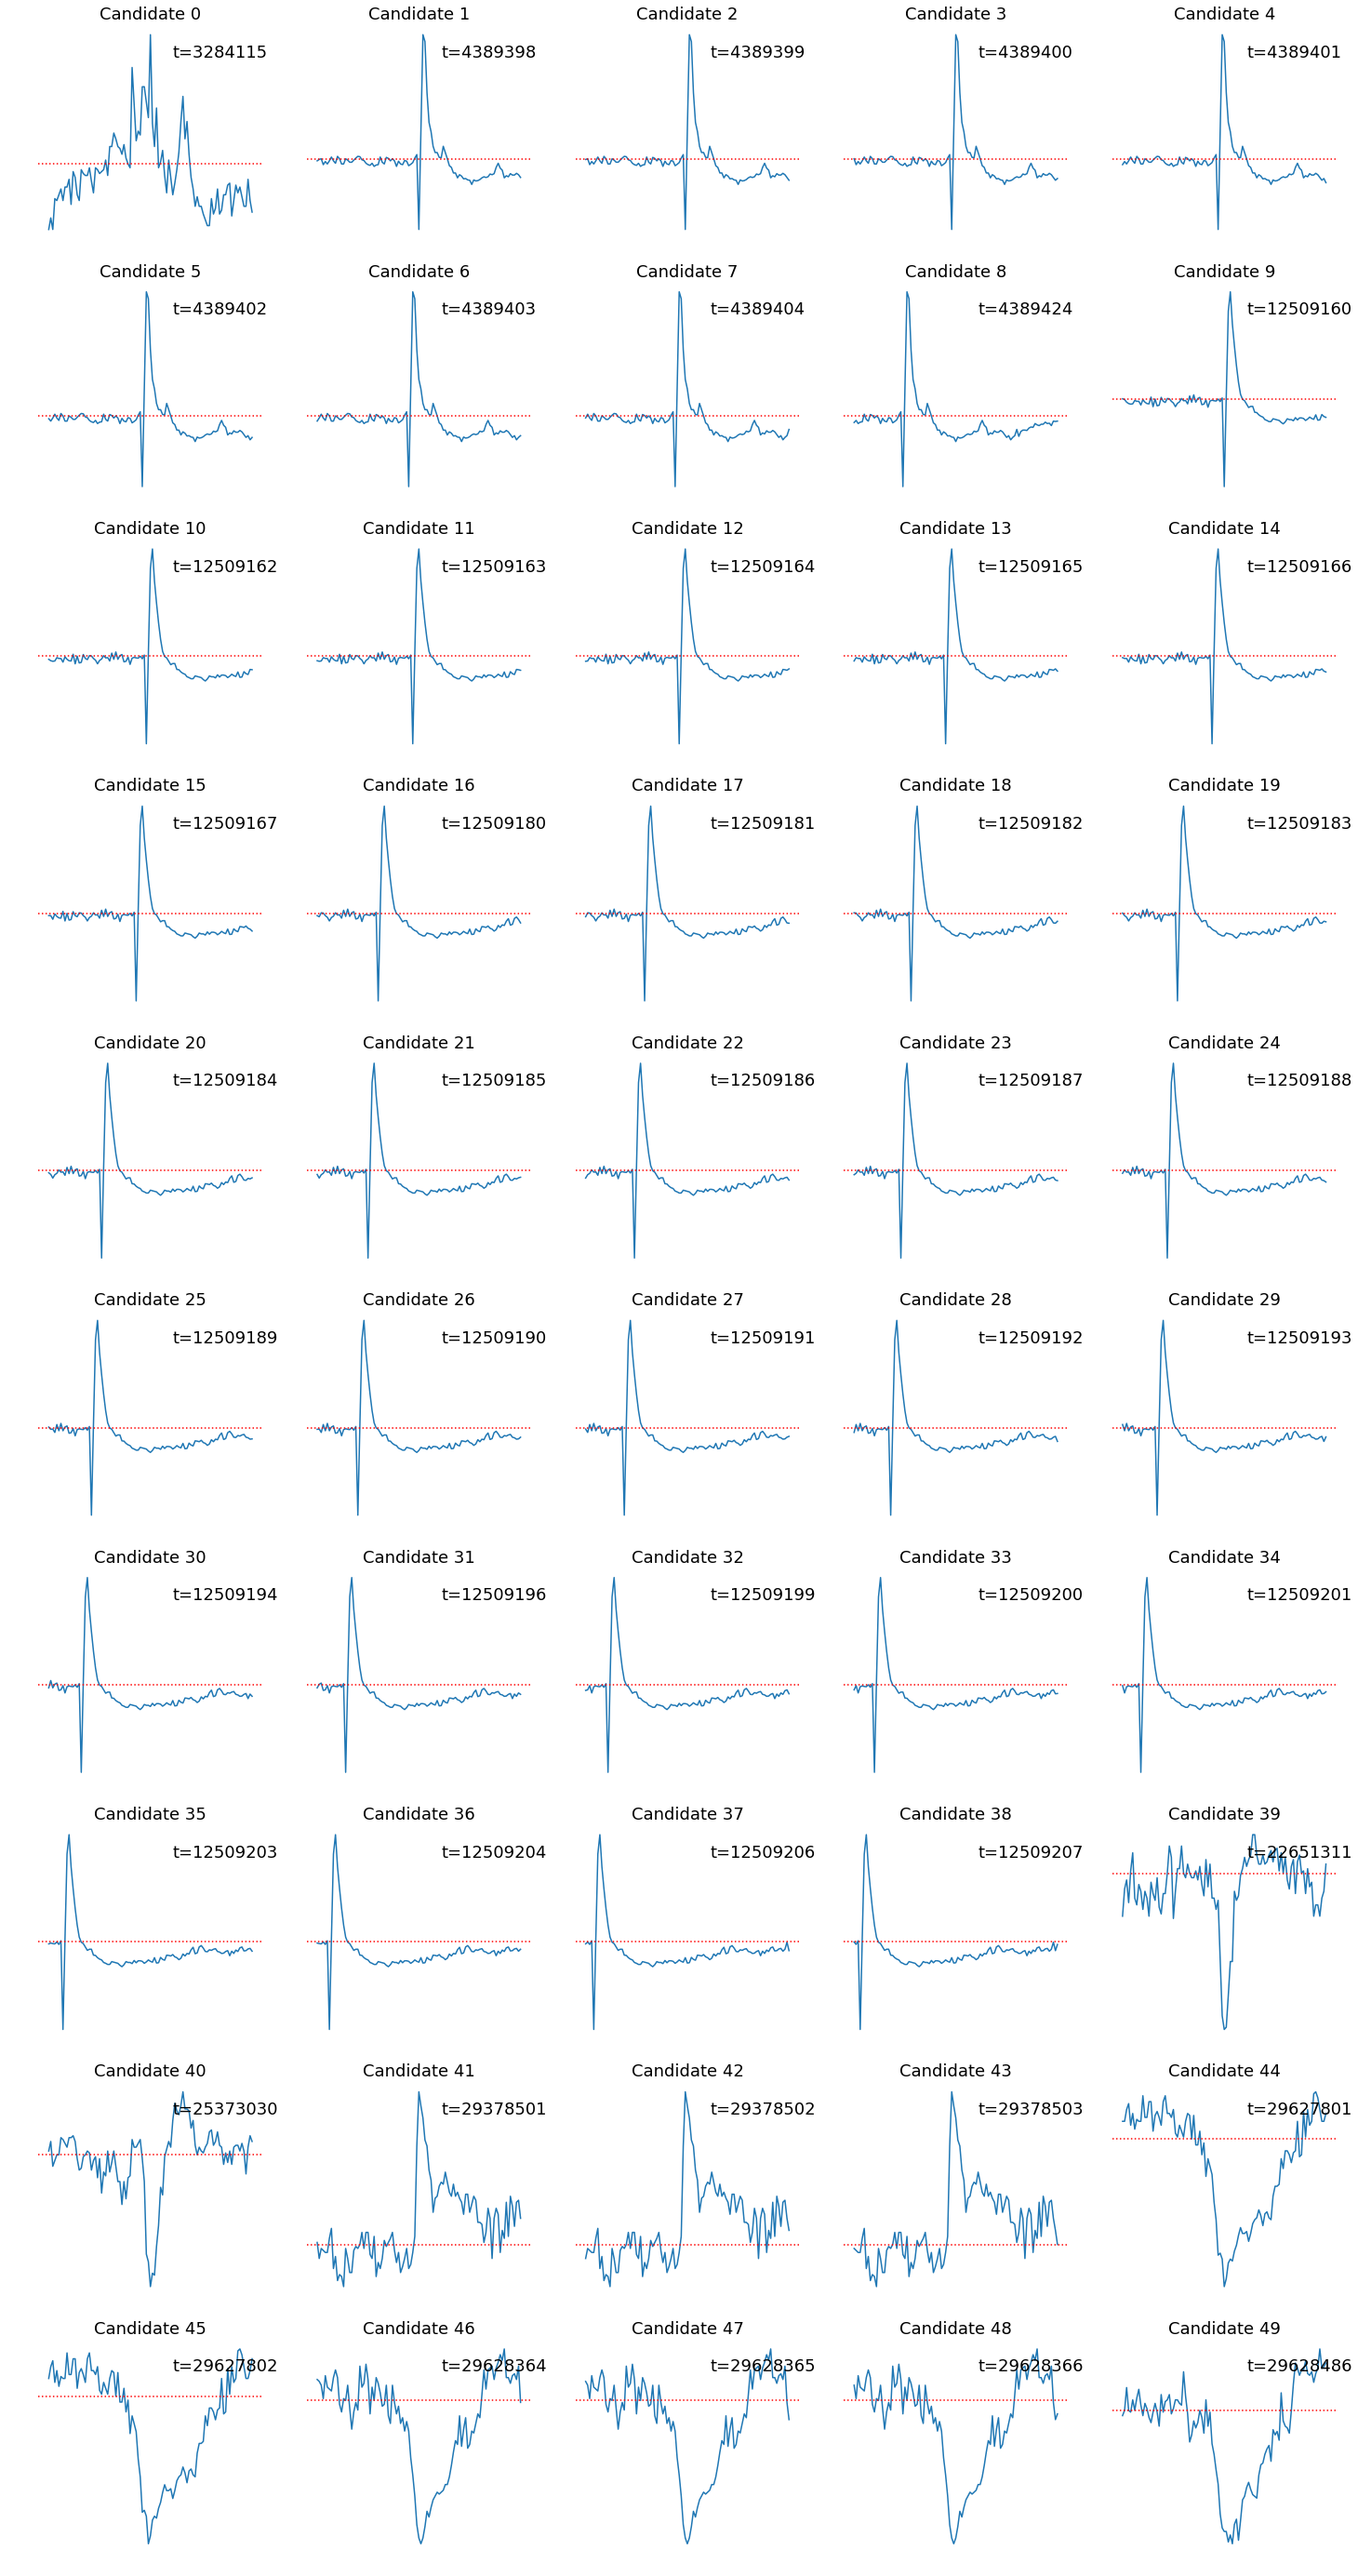

In [23]:
fig, axs = plt.subplots(10, 5, figsize=(25, 50))

i=0
for ax in axs.flat:
    df=pd.Series(sd[i,:])
    ax.plot(df.index, df)
    ax.axis('off')
    ax.set_title("Candidate "+str(i), fontsize=18)
    ax.text(0.6, 0.85, "t="+str(d[i]), fontsize=18, transform = ax.transAxes)
    #ax.spines['bottom'].set_position(('data',0))
    #ax.spines['left'].set_position(('data',50))
    #ax.spines['bottom'].set_color('none')
    #ax.spines['left'].set_color('none')
    #ax.spines['right'].set_color('none')
    #ax.spines['top'].set_color('none')
    ax.axhline(0.0, linestyle=':', color='r')
    #ax.set(xlabel='x-label', ylabel='y-label')
    i+=1

#for ax in axs.flat:
#    ax.label_outer()

In [14]:
#t = time.time()
#data = split_single_channel("190407_CA014_session_000.dat", np.int16, 374, 1)
#elapsed=time.time()-t
#print(elapsed)

In [28]:
single_number=sd.shape[0]
nsingle=list(range(sd.shape[0]))
time_window=sd.shape[1]
ntime=list(range(sd.shape[1]))
flags=np.ones(shape=sd.shape[0], dtype=np.int)
group_ID=np.zeros(shape=sd.shape[0], dtype=np.int)
#print(flags.shape[0])
#print(sd[:10,:])
#print(flags[:5])
#print(np.any(flags[:5]),np.argmax(flags > 0))
#a=pd.Series(sd[0,:])
#b=pd.Series(sd[5,:])
#corrma=np.zeros(shape=10, dtype=np.float64)
#print(b.shift(periods=-8).fillna(0.))

#for t in list(range(10)):
#    corrma[t]=a.corr(b.shift(periods=-t).fillna(0.), method="pearson")
#    print("delay time=", t, "corr=", corrma[t])
        
#max_value=np.amax(corrma)
#max_index=np.where(corrma==max_value)[0]
#print(max_value, max_index)
    


$$R_{xy}\left[m\right] = \sum_{n=-\infty}^{\infty}x\left[n\right]y^{\star}\left[n-m\right]$$

In [67]:
#function pointer list
cal_corr=[corl_dumy, corl]

s1=sd[1,:]
s2=sd[2,:]
time_window=101
print(s1)
print(s2)
print(sum(s1[:]*s1[:]))
print(np.inner(s1, s1))
print(np.inner(s2, s2))
print(np.dot(s1, s1))
print(np.dot(s2, s2))
print(np.linalg.norm(s1))
print(np.linalg.norm(s2))
cal_corr[1](s1, s2)[1]
#print(cal_corr[1](s1, s2)[0], cal_corr[1](s1, s2)[1])

[  -5   -1    1  -16   -7  -14   -5    6   -5  -12    8    1  -14  -14
    1   -3   -9   -9   -3    3    8    7   -2   -4  -12  -16  -18  -12
  -21  -17  -16    6   -9  -14    5    2   -5    1   -5  -21   -6  -14
  -16   -4   -6  -19  -15  -10    3   13 -203   80  359  339  192  106
   79   37   19   19    5    4   37   19    1  -19  -24  -40  -40  -54
  -45  -49  -57  -56  -60  -61  -73  -60  -63  -62  -59  -54  -51  -53
  -51  -43  -45  -42  -24  -12  -26  -32  -54  -48  -51  -42  -46  -46
  -41  -45  -53]
[  -1    1  -16   -7  -14   -5    6   -5  -12    8    1  -14  -14    1
   -3   -9   -9   -3    3    8    7   -2   -4  -12  -16  -18  -12  -21
  -17  -16    6   -9  -14    5    2   -5    1   -5  -21   -6  -14  -16
   -4   -6  -19  -15  -10    3   13 -203   80  359  339  192  106   79
   37   19   19    5    4   37   19    1  -19  -24  -40  -40  -54  -45
  -49  -57  -56  -60  -61  -73  -60  -63  -62  -59  -54  -51  -53  -51
  -43  -45  -42  -24  -12  -26  -32  -54  -48  -51  -42  -46

/home/acyang/miniconda3/envs/intelpython/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


0.07277268299473394

In [65]:
k=1
#Because the outter loop list may change in the inner loop operation, so we use while here.
while (np.any(flags[:10])) :
    #print("Before", flags[:10])
    #find the next one
    i=np.argmax(flags > 0)
    s1=sd[i,:]
    #prevent duplicated calculation by setting flag to 0
    flags[i]=0
    #asign gid to -1 (uncategory), if it found similiar signal in the inner loop, they will be asign the same gid.
    group_ID[i]=-1
    found_highly_corr=False
    #print("After", flags[:10])
    #for j in nsingle:
    #for j in list(it.compress(nsingle, flags)):
    for j in list(range(10)):
        s2=sd[j,:]
        print("i=", i, "\t", "j=", j, "\t", "flags[i]=", flags[i], "flags[j]=", flags[j])
        corr_coef=cal_corr[flags[j]](s1, s2)[1]
        print(corr_coef)
        if (corr_coef >= 0.8) : 
            flags[j]=0
            group_ID[j]=k
            found_highly_corr=True
            
            print("corr_coef=", corr_coef, "remove",j , "from list.\t", flags[:10], group_ID[:10])
    if found_highly_corr:
        group_ID[i]=k
        k+=1
    else:
        pass
    
    print(group_ID[:50])
    input("Press Enter to continue...")

/home/acyang/miniconda3/envs/intelpython/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


[  -5   -1    1  -16   -7  -14   -5    6   -5  -12    8    1  -14  -14
    1   -3   -9   -9   -3    3    8    7   -2   -4  -12  -16  -18  -12
  -21  -17  -16    6   -9  -14    5    2   -5    1   -5  -21   -6  -14
  -16   -4   -6  -19  -15  -10    3   13 -203   80  359  339  192  106
   79   37   19   19    5    4   37   19    1  -19  -24  -40  -40  -54
  -45  -49  -57  -56  -60  -61  -73  -60  -63  -62  -59  -54  -51  -53
  -51  -43  -45  -42  -24  -12  -26  -32  -54  -48  -51  -42  -46  -46
  -41  -45  -53]
[  -1    1  -16   -7  -14   -5    6   -5  -12    8    1  -14  -14    1
   -3   -9   -9   -3    3    8    7   -2   -4  -12  -16  -18  -12  -21
  -17  -16    6   -9  -14    5    2   -5    1   -5  -21   -6  -14  -16
   -4   -6  -19  -15  -10    3   13 -203   80  359  339  192  106   79
   37   19   19    5    4   37   19    1  -19  -24  -40  -40  -54  -45
  -49  -57  -56  -60  -61  -73  -60  -63  -62  -59  -54  -51  -53  -51
  -43  -45  -42  -24  -12  -26  -32  -54  -48  -51  -42  -46

KeyboardInterrupt: 

In [ ]:
data=np.arange(10)
selectors=np.ones(10, dtype=np.int)
print(data)
print(selectors)

In [ ]:
l = random.sample(range(10), 10)
print(l)

In [ ]:
for i in l:
    selectors[i]=0
    print(selectors)
    for j in list(it.compress(data, selectors)):
        print(i, j,selectors)
        selectors[0]=0